# Xtern Submission For Data-Science #

In [160]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests

In [161]:
df = pd.read_csv("2020-XTern-DS.csv", low_memory=False)

## Looking at the initial data ##

In [162]:
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


### Changing Latitude and Longitude to float integers with two decimals for better readability ###

In [163]:
df['Latitude'] = df['Latitude'].apply(lambda x: float('%.2f'%(x)))
df['Longitude'] = df['Longitude'].apply(lambda x: float('%.2f'%(x)))

## Changing most objects to floats if possible by removing '$' , '__ minutes', etc ##

In [164]:
df.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost      object
Minimum_Order     object
Rating            object
Votes             object
Reviews           object
Cook_Time         object
dtype: object

In [165]:
df['Cook_Time'] = df['Cook_Time'].replace(['30 minutes', '65 minutes', '45 minutes', '10 minutes','20 minutes', '120 minutes', '80 minutes'],
    [30, 65, 45, 10, 20, 120, 80]
)

In [166]:
df['Average_Cost'] = df['Average_Cost'].replace([
    '$20.00', '$10.00', '$15.00', '$25.00', '$65.00', '$35.00','$80.00', '$5.00', '$40.00', '$60.00', '$30.00', '$75.00', '$45.00', '$55.00', '$100.00', '$50.00', '$90.00', '1,00', '1,20','$95.00', '$85.00', '$150.00'],
[20.00,10.00,15.00,25.00,65.00,35.00,80.00,5.00,40.00,60.00, 30.00, 75.00, 45.00, 55.00, 100.00, 50.00, 90.00, 1.00,1.20,95.00, 85.00, 150.00]
)

In [167]:
df['Minimum_Order'] = df['Minimum_Order'].replace(['$50.00', '$99.00', '$0.00', '$200.00', '$450.00', '$350.00','$79.00'],
[50.00, 99.00, 0.00, 200.00, 450.00, 350.00,79.00]
)

In [168]:
df['Votes'] = df['Votes'].replace(['-'], 0)

In [169]:
df['Reviews'] = df['Reviews'].replace(['-'], 0)

In [170]:
df['Rating'] = df['Rating'].replace(['-', 'NEW', 'Opening Soon'], [0,2.5,0])

In [171]:
df['Cook_Time'] = df['Cook_Time'].astype('float')
df['Average_Cost'] = df['Average_Cost'].astype('float')
df['Minimum_Order'] = df['Minimum_Order'].astype('float')
df['Votes'] = df['Votes'].astype('float')
df['Reviews'] = df['Reviews'].astype('float')
df['Rating'] = df['Rating'].astype('float')

In [172]:
df.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost     float64
Minimum_Order    float64
Rating           float64
Votes            float64
Reviews          float64
Cook_Time        float64
dtype: object

In [291]:
# Cuisines in ascending order(Increases readabilty and reduces duplicates)
df['Cuisines'] = df['Cuisines'].apply(lambda x: ' '.join(sorted(x.split())))
new = df["Cuisines"].str.split(", ", n = 7, expand = True) 

df['Cuisine1'] = new[0]
df['Cuisine2'] = new[1]
df['Cuisine3'] = new[2]
df['Cuisine4'] = new[3]
df['Cuisine5'] = new[4]
df['Cuisine6'] = new[5]
df['Cuisine7'] = new[6]
df['Cuisine8'] = new[7]

## A correlation matrix to see if any values are correlated strongly ##
### Reviews and Votes are highly correlated which makes sense intuitively ###
### We can also see that Reviews and Average_Cost are correlated  ###

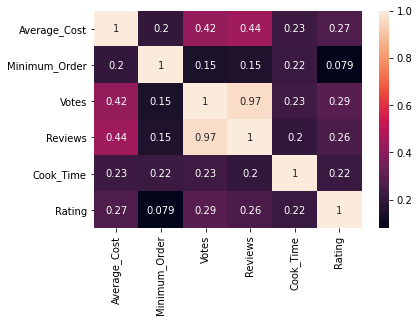

In [231]:
correlation = df[['Average_Cost','Minimum_Order', 'Votes', 'Reviews', 'Cook_Time', 'Rating']]
corrMatrix = correlation.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Looking at the relation between Average Cost and Reviews along with rating more closely since they are correlated ##

<AxesSubplot:title={'center':'Average_Cost'}, xlabel='Rating', ylabel='Cuisine1'>

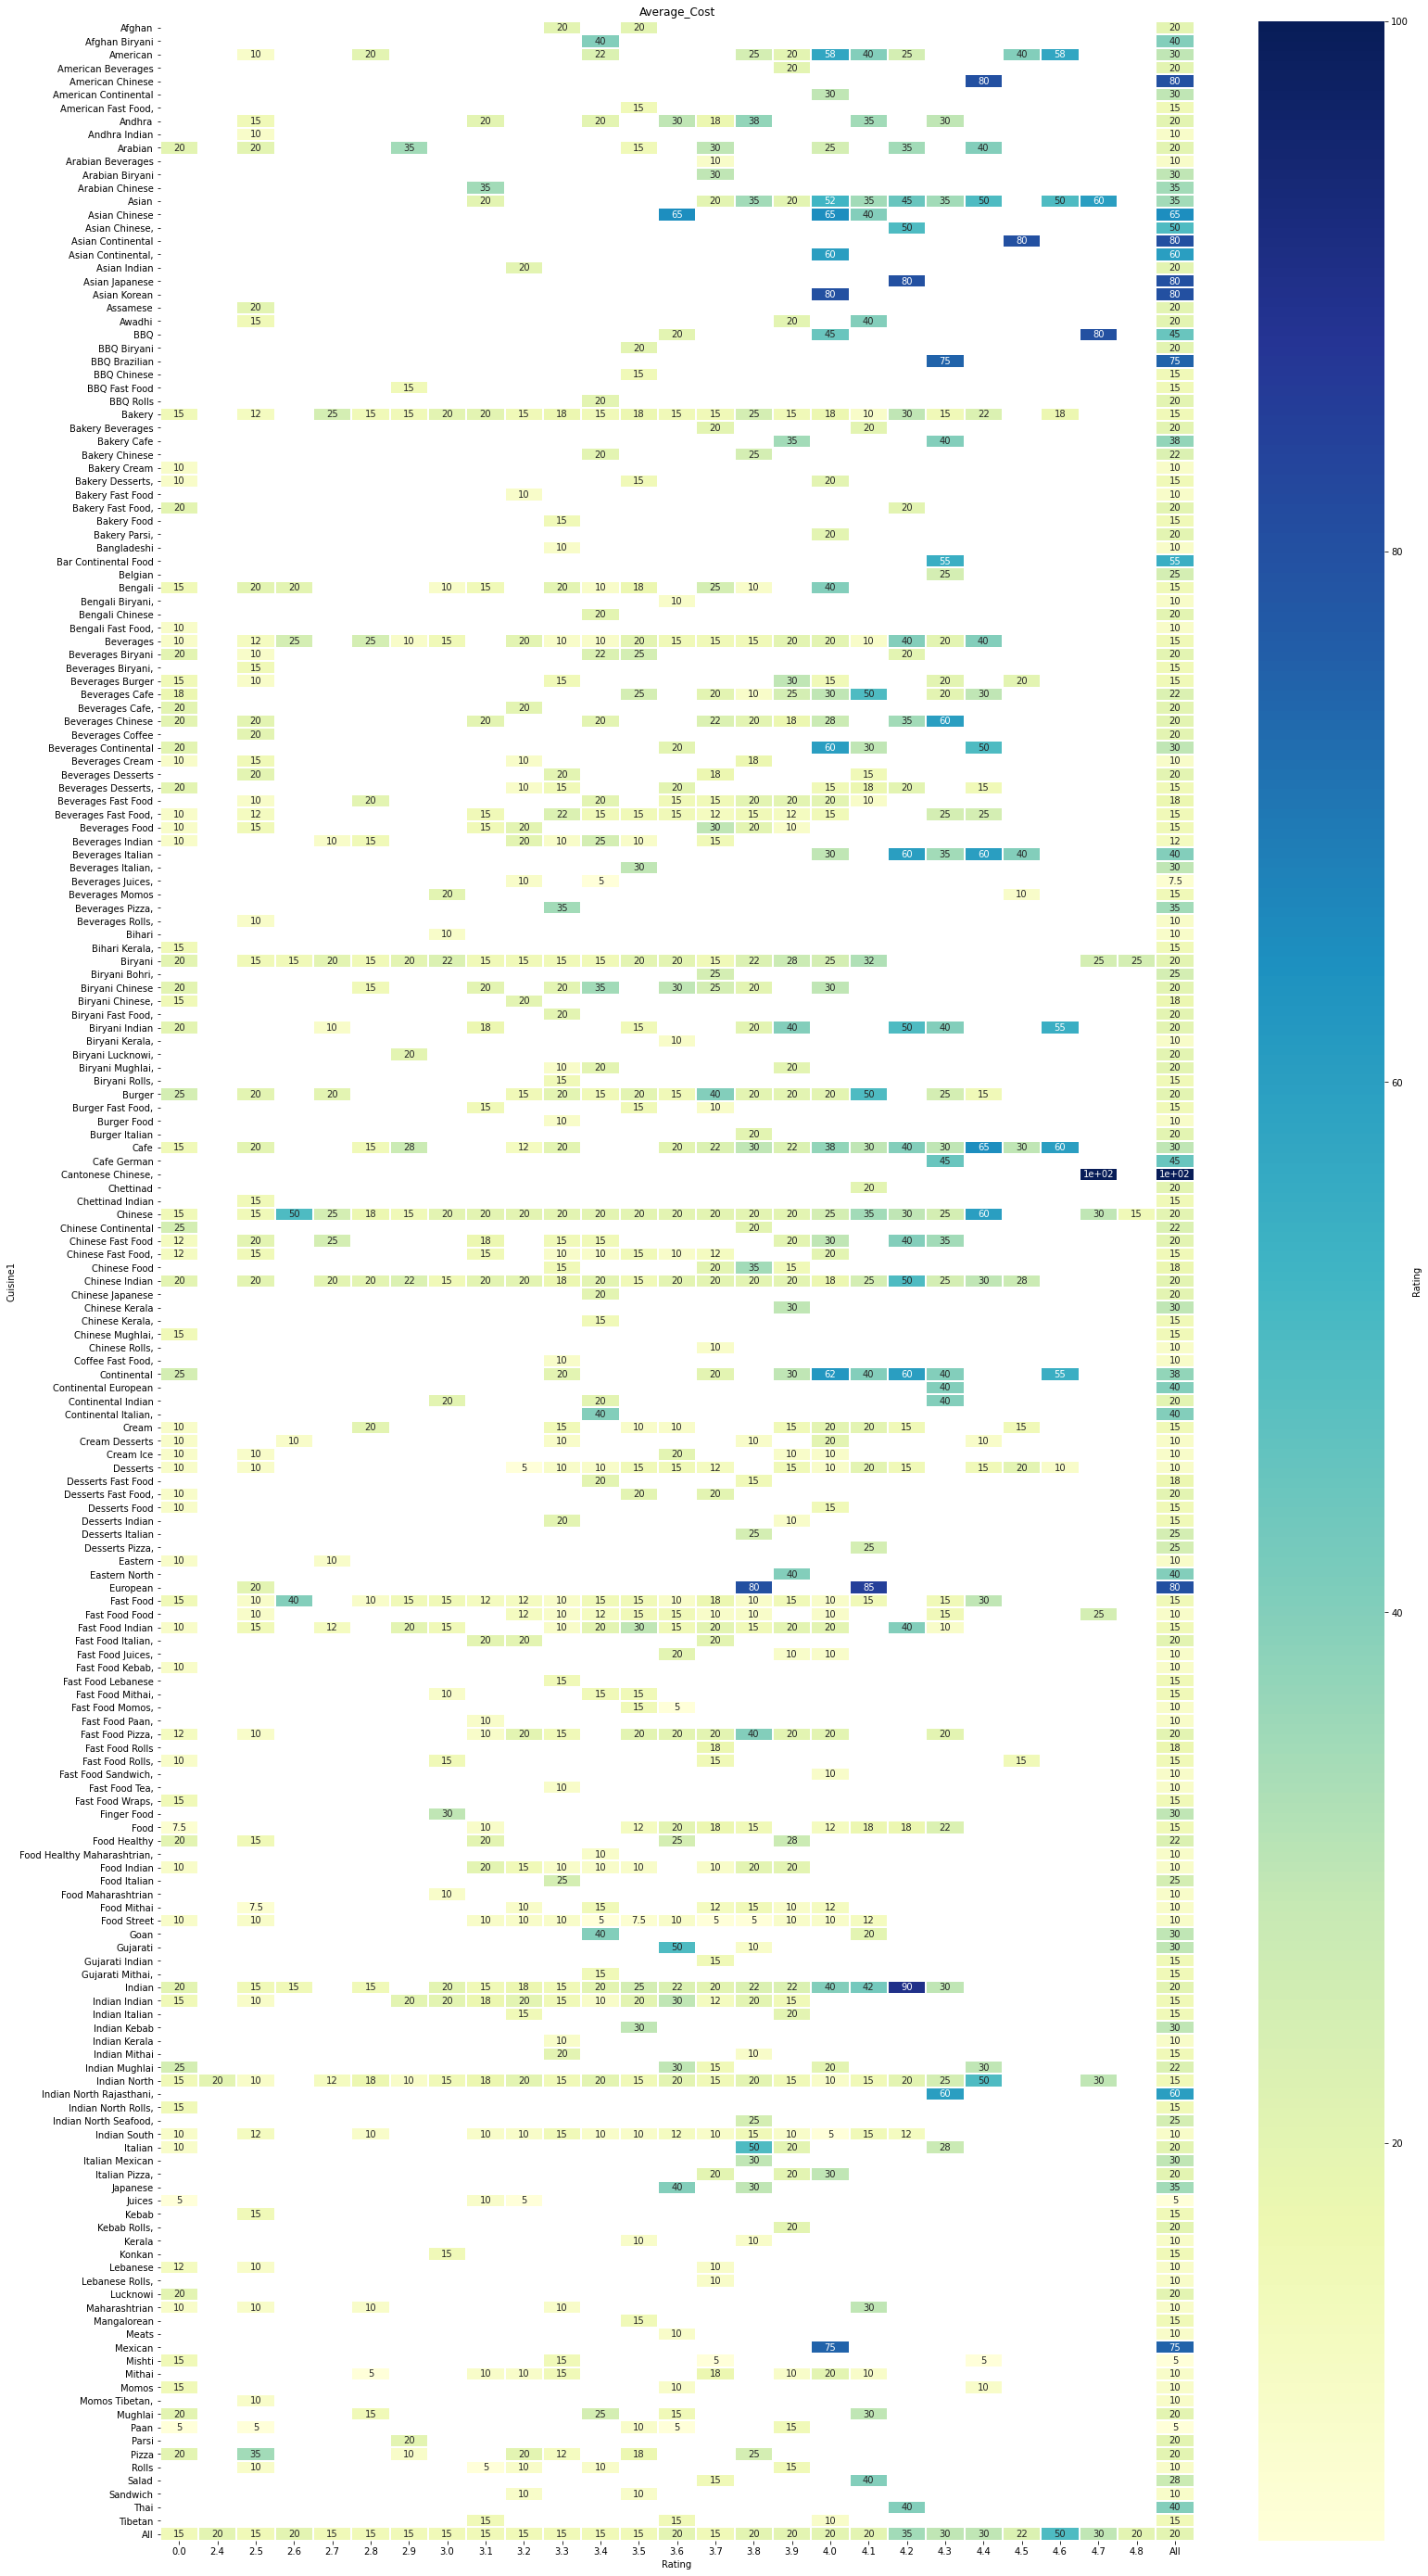

In [290]:
f, ax = plt.subplots(figsize = (25,50))
ax.set_title('{}'.format('Average_Cost'))
sns.heatmap(df.pivot_table('Average_Cost', index='Cuisine1',
                columns = ['Rating'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Rating'})

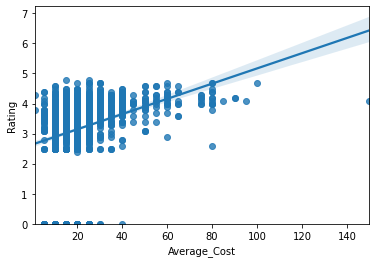

<AxesSubplot:xlabel='Rating'>

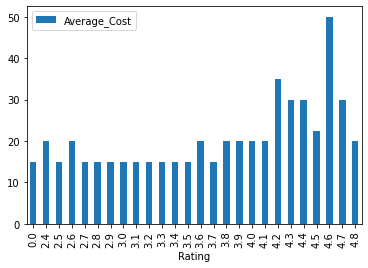

In [289]:
sns.regplot(x = 'Average_Cost', y = 'Rating', data = df)
plt.ylim(0,)
plt.show()

df[['Average_Cost', 'Rating']].groupby(['Rating']).median().sort_values("Rating", ascending = True).plot.bar()

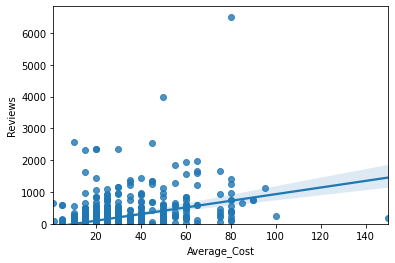

<AxesSubplot:xlabel='Average_Cost'>

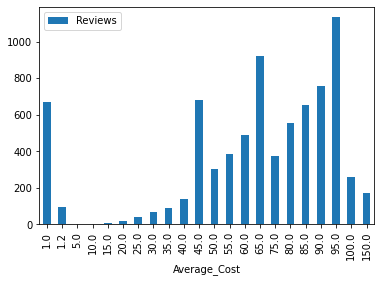

In [230]:
sns.regplot(x = 'Average_Cost', y = 'Reviews', data = df)
plt.ylim(0,)
plt.show()

df[['Reviews', 'Average_Cost']].groupby(['Average_Cost']).median().sort_values("Average_Cost", ascending = True).plot.bar()

# Conclusion 1: People who have paid more on average are More Likely to give a Positive Review #
# How this helps FoodieX: Using a recommender system based on Reviews and Ratings, FoodieX can maximize revenue from an order as Average cost will usually be higher #

In [234]:
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,ID_6321,39.26,-85.84,"Burger, Fast Food, Rolls, Salad, Wraps",20.0,50.0,3.5,12.0,4.0,30.0,Burger,Fast Food,Rolls,Salad,Wraps,None,None,None
1,ID_2882,39.78,-85.74,"Cream, Desserts Ice",10.0,50.0,3.5,11.0,4.0,30.0,Cream,Desserts Ice,None,None,None,None,None,None
2,ID_1595,39.25,-85.12,"Fast Food Food, Italian, Street",15.0,50.0,3.6,99.0,30.0,65.0,Fast Food Food,Italian,Street,None,None,None,None,None
3,ID_5929,39.03,-85.33,"Chinese Indian, Mughlai, North",25.0,99.0,3.7,176.0,95.0,30.0,Chinese Indian,Mughlai,North,None,None,None,None,None
4,ID_6123,39.88,-85.52,"Beverages Cafe,",20.0,99.0,3.2,521.0,235.0,65.0,"Beverages Cafe,",None,None,None,None,None,None,None


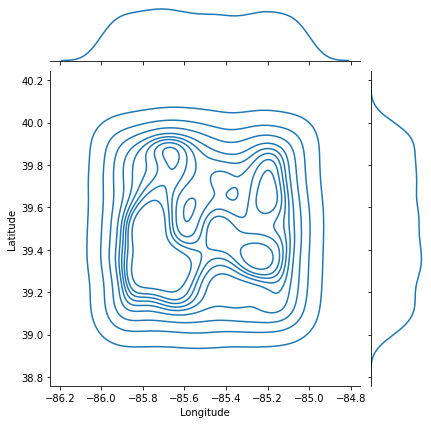

In [258]:
sns.jointplot(x='Longitude', y='Latitude', data=df, kind='kde')

# Conclusion 2 : Using the Above Graph, We can conclude that the best place for the delivery to be possible are those which are in the position range 
# Longitude = (-85.9 - 85.2) and Latitude = (39.2-39.8)
# How does this help foodieX: The delivery can be done quickly if the delivery is in those range of locations

## Rating the restaurants based on Rating and votes to find out the best restaurants in the county 

In [276]:
df.sort_values(['Rating','Votes'], ascending = False).head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
1325,ID_4728,39.14,-85.83,"Biryani, Indian, Momos Mughlai, North Rolls,",25.0,99.0,4.8,650.0,423.0,45.0,Biryani,Indian,Momos Mughlai,"North Rolls,",None,None,None,None
169,ID_7412,39.38,-85.50,"Chinese, Indian, North Rolls",15.0,50.0,4.8,326.0,234.0,30.0,Chinese,Indian,North Rolls,None,None,None,None,None
1180,ID_1064,39.59,-85.56,"BBQ, Continental, Indian, North Steak",80.0,50.0,4.7,9054.0,6504.0,45.0,BBQ,Continental,Indian,North Steak,None,None,None,None
1428,ID_2051,39.76,-85.50,"Chinese, Continental, Desserts Fast Food, Food...",30.0,50.0,4.7,3975.0,2359.0,65.0,Chinese,Continental,Desserts Fast Food,Food,Italian,Mexican,Street,None
1501,ID_7924,39.54,-85.59,"Chinese, Indian, Kebab, Mughlai North",80.0,50.0,4.7,1112.0,972.0,45.0,Chinese,Indian,Kebab,Mughlai North,None,None,None,None


## The top five restaurants in the county Have a few things in common
## 1. They are Indian/Chinese restaurants or both
# Conclusion 3: Indian and Chinese Restaurants are popular with a lot of orders,(assuming votes is an indication of orders).
# How This helps FoodieX: Even a slight increase (1%-2%) in delivery cost for Indian and Chinese restaurants could create a significant profit over a longer period of time  

In [ ]:
# Finding Out the relationship between average cost, cuisine and Rating

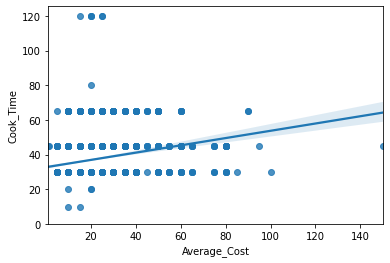

<AxesSubplot:xlabel='Cook_Time'>

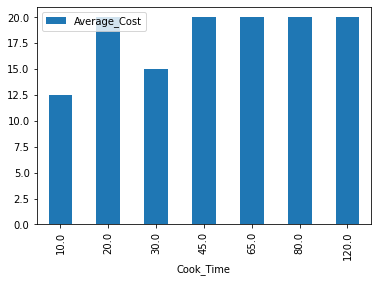

In [287]:
sns.regplot(x = 'Average_Cost', y = 'Cook_Time', data = df)
plt.ylim(0,)
plt.show()

df[['Average_Cost', 'Cook_Time']].groupby(['Cook_Time']).median().sort_values("Cook_Time", ascending = True).plot.bar()



In [ ]:
# Conclusion 4 : Cook Time, , Rating are all directly proportinal to each other, i.e. People 
# How this Helps 